# 使用Scikit-Learn 完成預測
### Scikit-Learn在三個面向提供支援。
1. 獲取資料:***klearn.datasets***
2. 掌握資料:***sklearn.preprocessing*** 
3. 機器學習:***sklearn Estimator API*** 

獲取資料的方式有很多種（包含檔案、資料庫、網路爬蟲、Kaggle Datasets等），<br>
其中最簡單的方式是從Sklearn import 內建的資料庫。由於其特性隨手可得且不用下載，所以我們通常叫他**玩具資料**：

# 基本架構

* 讀取資料&pre-processing
* 切分訓練集與測試集 
* 模型配適
* 預測 
* 評估(計算成績可能是誤差值或正確率或..)


In [40]:
%matplotlib inline

from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## 讀取Iris資料集與資料前處理

Iris Flowers 資料集

我們在這個項目中使用 Iris Data Set，這個資料集中的每個樣本有4個特徵，1個類別。該資料集1中的樣本類別數為3類，每類樣本數目為50個，總共150個樣本。

屬性資訊：

    花萼長度 sepal length(cm)
    花萼寬度 sepal width(cm)
    花瓣長度 petal length(cm)
    花瓣寬度 petal width(cm)
    類別：
        Iris Setosa
        Iris Versicolour
        Iris Virginica

樣本特徵資料是數值型的，而且單位都相同（釐米）。

![Iris Flowers](images/iris_data.PNG)


In [2]:
iris = datasets.load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

* 印出iris的key值與檔案位置
* 查看前10筆資料
* 查看資料型別
* 印出標註的樣本類別資料

In [9]:
print(iris.keys())
print(iris.filename)
print(iris['filename'])
print(iris.data[0:10])
print(type(iris.data))
print(iris.target)

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
iris.csv
iris.csv
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]
<class 'numpy.ndarray'>
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [3]:
# we only take the first two features. 
X = iris.data[:,:2]
print(X.shape)  # print X dimension
Y = iris.target
print(Y.shape)  # print Y dimension
X
Y

(150, 2)
(150,)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [4]:
#以下是組成 pandas DataFrame (也可以不用這種做)
x = pd.DataFrame(iris.data, columns=iris['feature_names'])
x.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [5]:
iris['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [6]:
#建立Target欄位與資料
y = pd.DataFrame(iris['target'], columns=['target'])
y.head()

,target
0,0
1,0
2,0
3,0
4,0


In [7]:
#合併資料特徵欄位與目標欄位
iris_data = pd.concat([x,y], axis=1)  # concat x, y至同一個array
iris_data = iris_data[['sepal length (cm)','petal length (cm)','target']]
iris_data.head(10)

,sepal length (cm),petal length (cm),target
0,5.1,1.4,0
1,4.9,1.4,0
2,4.7,1.3,0
3,4.6,1.5,0
4,5.0,1.4,0
5,5.4,1.7,0
6,4.6,1.4,0
7,5.0,1.5,0
8,4.4,1.4,0
9,4.9,1.5,0


In [8]:
#只選擇目標為0與1的資料
iris_data = iris_data[iris_data['target'].isin([0, 1])]  # isin是一個filter功能的函數
iris_data
# print(iris['data'].size/len(iris['feature_names']))   # 150 column, 4 rows(features)

,sepal length (cm),petal length (cm),target
0,5.1,1.4,0
1,4.9,1.4,0
2,4.7,1.3,0
3,4.6,1.5,0
4,5.0,1.4,0
...,...,...,...
95,5.7,4.2,1
96,5.7,4.2,1
97,6.2,4.3,1
98,5.1,3.0,1


## 切分訓練集與測試集
> train_test_split()

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(iris_data[['sepal length (cm)','petal length (cm)']], iris_data[['target']], test_size=0.3)  # test_size =03, 70% train, 30% test

In [15]:
X_train.head()

,sepal length (cm),petal length (cm)
69,5.6,3.9
17,5.1,1.4
19,5.1,1.5
24,4.8,1.9
6,4.6,1.4


In [16]:
X_train.shape

(70, 2)

In [17]:
X_test.head()

,sepal length (cm),petal length (cm)
60,5.0,3.5
97,6.2,4.3
88,5.6,4.1
99,5.7,4.1
63,6.1,4.7


In [18]:
X_test.shape

(30, 2)

In [26]:
Y_train.head()

,target
91,1
95,1
48,0
41,0
83,1


In [23]:
Y_train.shape

(70,)

In [27]:
Y_test.head()

,target
44,0
21,0
9,0
19,0
34,0


In [24]:
Y_test.shape

(30,)

# Appendix 

>normalization和standardization是差不多的<br>
都是把數據進行前處理，從而使數值都落入到統一的數值範圍，從而在建模過程中，各個特徵量沒差別對待。<br> 
* normalization一般是把數據限定在需要的範圍，比如一般都是【0，1】，從而消除了數據量綱對建模的影響。<br> 
* standardization 一般是指將數據正態化，使平均值0方差為1.<br> 

因此normalization和standardization 是針對數據而言的，消除一些數值差異帶來的特種重要性偏見。<br>
經過歸一化的數據，能加快訓練速度，促進算法的收斂。

### Standardization (z-score)
    to compute the mean and standard deviation on a training set so as to be able to later reapply the same transformation on the testing set. 

In [29]:
from IPython.display import Math
Math(r'x^{(i)}_{norm}=\frac{x^{(i)}-x_{min}}{x_{max}-x_{min}}')

<IPython.core.display.Math object>

In [31]:
Math(r'x^{(i)}_{std}=\frac{x^{(i)}-\mu_{x}}{\sigma_{x}}')

<IPython.core.display.Math object>

In [49]:
def norm_stats(dfs):
    minimum = np.min(dfs, axis=0)
    maximum = np.max(dfs, axis=0)
    mu = np.mean(dfs, axis=0)
    sigma = np.std(dfs, axis=0)
    return minimum, maximum, mu, sigma
#指定 axis=0，我們確保均值和標準差是針對每一列單獨計算的

def z_score(col, stats):
    minimum, maximum, mu, sigma = stats
    df = pd.DataFrame()
    for c in col.columns:
        df[c] = (col[c]-mu[c])/sigma[c]
    return df

In [45]:
X_train

,sepal length (cm),petal length (cm)
44,5.1,1.9
10,5.4,1.5
12,4.8,1.4
38,4.4,1.3
14,5.8,1.2
...,...,...
40,5.0,1.3
62,6.0,4.0
8,4.4,1.4
24,4.8,1.9


In [50]:
stats = norm_stats(X_train)
arr_x_train = np.array(z_score(X_train, stats))
arr_x_train

array([[-0.58257331, -0.61787524],
       [-0.11562524, -0.89601843],
       [-1.04952138, -0.96555423],
       [-1.67211881, -1.03509003],
       [ 0.50697219, -1.10462583],
       [-0.89387203,  0.35562594],
       [ 0.35132284,  0.49469754],
       [-1.51646946, -1.03509003],
       [ 1.75216706,  1.25959132],
       [-0.89387203, -0.96555423],
       [ 0.66262155,  0.98144813],
       [ 0.97392027,  0.84237653],
       [ 0.19567348,  0.56423334],
       [-1.3608201 , -1.24369743],
       [-0.73822267,  0.49469754],
       [ 1.28521898,  1.12051973],
       [ 0.19567348,  1.19005553],
       [ 0.04002412,  0.84237653],
       [ 1.90781641,  1.12051973],
       [-0.42692395, -0.89601843],
       [ 0.50697219,  0.84237653],
       [ 0.04002412,  1.12051973],
       [-0.89387203, -0.89601843],
       [-0.73822267, -0.82648264],
       [-0.73822267,  0.35562594],
       [-1.3608201 , -0.96555423],
       [ 0.35132284, -0.75694684],
       [ 2.06346577,  1.39866292],
       [ 0.35132284,

In [55]:
stats = norm_stats(X_train)
arr_x_train = np.array(z_score(X_train, stats))
arr_y_train = np.array(Y_train)
arr_x_train[:5]

array([[-0.58257331, -0.61787524],
       [-0.11562524, -0.89601843],
       [-1.04952138, -0.96555423],
       [-1.67211881, -1.03509003],
       [ 0.50697219, -1.10462583]])

In [56]:
stats = norm_stats(X_test)
arr_x_test = np.array(z_score(X_test, stats))
arr_y_test = np.array(Y_test)
arr_x_test[:5]

array([[0.05829252, 0.46597117],
       [1.80706798, 0.95280672],
       [0.53523128, 0.74416291],
       [2.28400674, 1.30054639],
       [0.05829252, 0.67461497]])

## use sklearn

In [57]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler().fit(X_train)  #Compute the statistics to be used for later scaling.
print(sc.mean_)  #mean
print(sc.scale_) #standard deviation

[5.47428571 2.78857143]
[0.64246972 1.43810817]


In [58]:
#transform: (x-u)/std.
X_train_std = sc.transform(X_train)
X_train_std[:5]

array([[-0.58257331, -0.61787524],
       [-0.11562524, -0.89601843],
       [-1.04952138, -0.96555423],
       [-1.67211881, -1.03509003],
       [ 0.50697219, -1.10462583]])

The scaler instance can then be used on new data to transform it the same way it did on the training set:

In [59]:
X_test_std = sc.transform(X_test)
print(X_test_std[:10])

[[ 0.04002412  0.63376914]
 [ 1.75216706  1.12051973]
 [ 0.50697219  0.91191233]
 [ 2.21911513  1.46819872]
 [ 0.04002412  0.84237653]
 [-1.04952138 -0.82648264]
 [-1.67211881 -1.03509003]
 [ 0.35132284  0.98144813]
 [ 0.19567348  0.91191233]
 [-0.58257331 -0.89601843]]


you can also use fit_transform method (i.e., fit and then transform)    

In [62]:
X_train_std = sc.fit_transform(X_train)  #一次到位的轉換
X_test_std = sc.fit_transform(X_test)
print(X_test_std[:10])


[[ 0.05829252  0.46597117]
 [ 1.80706798  0.95280672]
 [ 0.53523128  0.74416291]
 [ 2.28400674  1.30054639]
 [ 0.05829252  0.67461497]
 [-1.0545646  -0.99453548]
 [-1.69048295 -1.20317928]
 [ 0.37625169  0.81371085]
 [ 0.2172721   0.74416291]
 [-0.57762583 -1.06408341]]


In [63]:
print('mean of X_train_std:',np.round(X_train_std.mean(),4))
print('std of X_train_std:',X_train_std.std())

mean of X_train_std: -0.0
std of X_train_std: 0.9999999999999999


## Min-Max Normaliaztion
    Transforms features by scaling each feature to a given range.
    The transformation is given by:

    X' = X - X.min(axis=0) / ((X.max(axis=0) - X.min(axis=0))
    X -> N 維資料
    


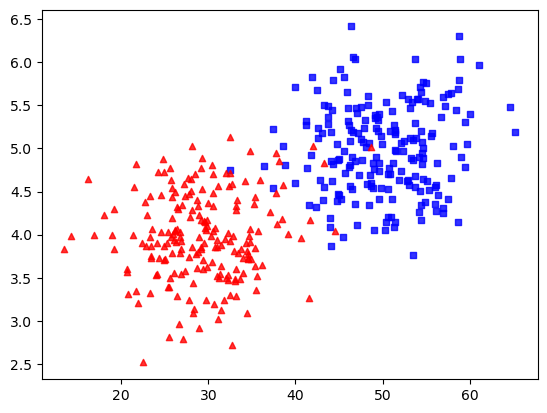

50.564864477143935
29.376469505339898


In [69]:
x1 = np.random.normal(50, 6, 100)  # np.random.normal(mu,sigma,size))
y1 = np.random.normal(5, 0.5, 100)

x2 = np.random.normal(30,6,100)
y2 = np.random.normal(4,0.5,100)
plt.scatter(x1,y1,c='b',marker='s',s=20,alpha=0.8)
plt.scatter(x2,y2,c='r', marker='^', s=20, alpha=0.8)
plt.show()
print(np.sum(x1)/len(x1))
print(np.sum(x2)/len(x2))

In [78]:
x_val = np.concatenate((x1,x2))
y_val = np.concatenate((y1,y2))

x_val.shape

(200,)

In [66]:
def minmax_norm(X):
    return (X - X.min(axis=0)) / ((X.max(axis=0) - X.min(axis=0)))

In [67]:
minmax_norm(x_val[:10])

array([0.        , 0.4358826 , 0.35486729, 0.48870608, 0.85551735,
       1.        , 0.93429682, 0.39539999, 0.23095127, 0.45202607])

In [79]:
from sklearn.preprocessing import MinMaxScaler
print(x_val.shape)
x_val=x_val.reshape(-1, 1)  # 1D to 2D
print(x_val.shape)
scaler = MinMaxScaler().fit(x_val)  # default range 0~1
print(scaler.data_max_)
print(scaler.data_min_)
print(scaler.transform(x_val)[:10])

(200,)
(200, 1)
[65.24558548]
[13.46389845]
[[0.72585544]
 [0.55982261]
 [0.77858588]
 [0.92042025]
 [0.78535566]
 [0.79376951]
 [0.64599254]
 [0.87458061]
 [0.68577635]
 [0.57684499]]
